In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
from tabulate import tabulate
%run "generate_detail.py"

words_count_data, entities_count_data, entity_types_count_data, max_length = collect_stats(
    "entity-tag"
)

## Description

In [6]:
df = pd.read_csv("all_data/all_segment_dataset.csv")
print("Data Shape:", df.shape)
df.head(5)

Data Shape: (29014, 2)


,Question,Intent
0,តើ CADT បាន ប្រកាស ថា មាន ការ ប្រកួត ប្រជែង អ្...,AskAboutCompetition
1,តើ CADT បាន ប្រកាស ថា មាន Competition អ្វី ខ្លះ ?,AskAboutCompetition
2,តើ CADT បាន បង្កើត នូវ កម្ម វិធី ការ ប្រកួត ប្...,AskAboutCompetition
3,តើ CADT បាន បង្កើត នូវ កម្ម វិធី Competition អ...,AskAboutCompetition
4,តើ CADT បាន host នូវ កម្ម វិធី ការ ប្រកួត ប្រជ...,AskAboutCompetition


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29014 entries, 0 to 29013
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Question  29014 non-null  object
 1   Intent    29014 non-null  object
dtypes: object(2)
memory usage: 453.5+ KB


In [8]:
# Find Total
print("------------------------------")
print(" Total Sentence length: ", df.Question.count())
print("------------------------------")

------------------------------
 Total Sentence length:  29014
------------------------------


## File Description 

In [9]:
pos = os.listdir('POS')
dataset = os.listdir('datasets')
entity = os.listdir('entity-tag')
segment = os.listdir('segments')
print("POS : {} files.".format(len(pos)))
print("datasets : {} files.".format(len(dataset)))
print("entity-tag : {} files.".format(len(entity)))
print("segments : {} files.".format(len(segment)))

POS : 53 files.
datasets : 53 files.
entity-tag : 53 files.
segments : 53 files.


## Words Description 

In [10]:
words_count = pd.DataFrame.from_dict(words_count_data, orient="index").sort_values(0, ascending=False).reset_index()
words_count.columns = ["Word", "Count"]

entities_count = pd.DataFrame.from_dict(entities_count_data, orient="index").sort_values(0, ascending=False).reset_index()
entities_count.columns = ["Id", "Count"]
entity_type_codes = [id.split(":")[1] for id in entities_count["Id"]]
entities = [id.split(":")[0] for id in entities_count["Id"]]
entities_count["Type"] = entity_type_codes
entities_count["Entity"] = entities
entities_count.drop(columns=["Id"], inplace=True)
entities_count.sort_values(['Type', 'Count'], inplace=True)
entities_count = entities_count[["Type", "Entity", "Count"]]

entity_types_count = pd.DataFrame.from_dict(entity_types_count_data, orient="index").sort_values(0, ascending=False).reset_index()
entity_types_count.columns = ["Entity Type", "Count"]

In [11]:
words_count.head(10)

,Word,Count
0,នៅ,7434
1,មាន,7066
2,ថា,6770
3,សាលា,5074
4,ទៅ,5037
5,ប៉ុន្មាន,4495
6,អត់,4102
7,ការ,3868
8,តើ,3602
9,ទេ,3573


Text(0, 0.5, 'Words')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 6035 (\N{KHMER LETTER NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 6085 (\N{KHMER VOWEL SIGN AU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 6040 (\N{KHMER LETTER MO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 6070 (\N{KHMER VOWEL SIGN AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPyt

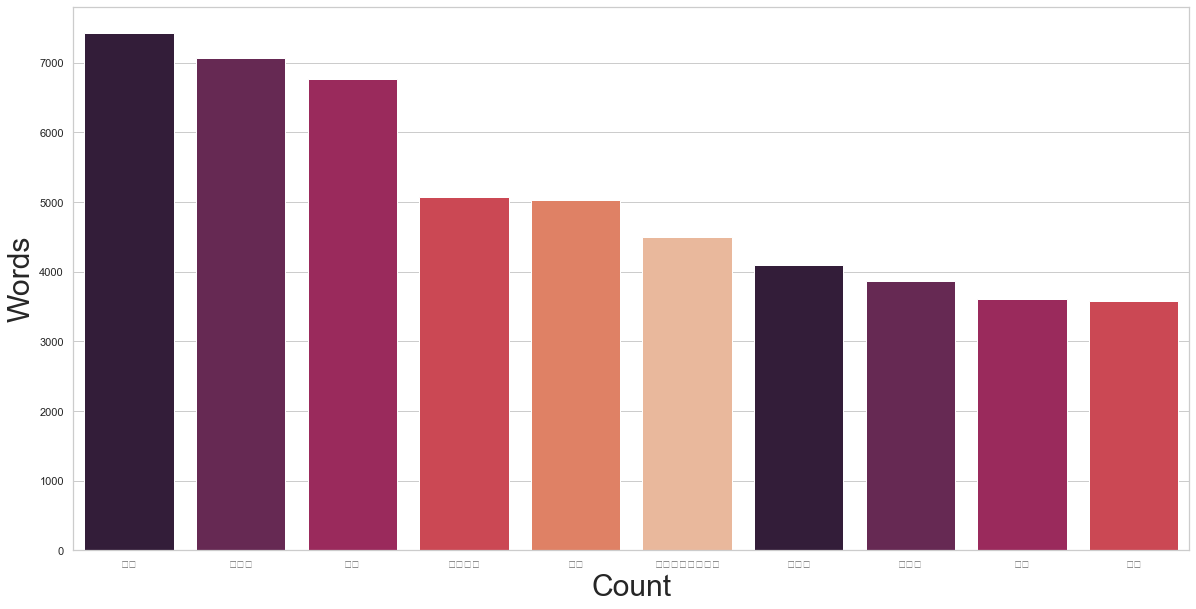

In [19]:
colors = sns.color_palette('rocket')
plt.figure(figsize=(20, 10))
sns.barplot(data=words_count.head(10), x="Word", y="Count", palette=colors)
plt.xlabel("Count", fontsize=30)
plt.ylabel("Words", fontsize=30)

## Entity Description

In [13]:
entity_types_count.head(10)

,Entity Type,Count
0,ORG,5974
1,BUILD,4907
2,PER,3784
3,ROOM,1300
4,MAJOROR,912
5,GPE,340
6,GEN,180
7,JOB,176
8,TERM,168
9,DATE,42


Text(0, 0.5, 'Count')

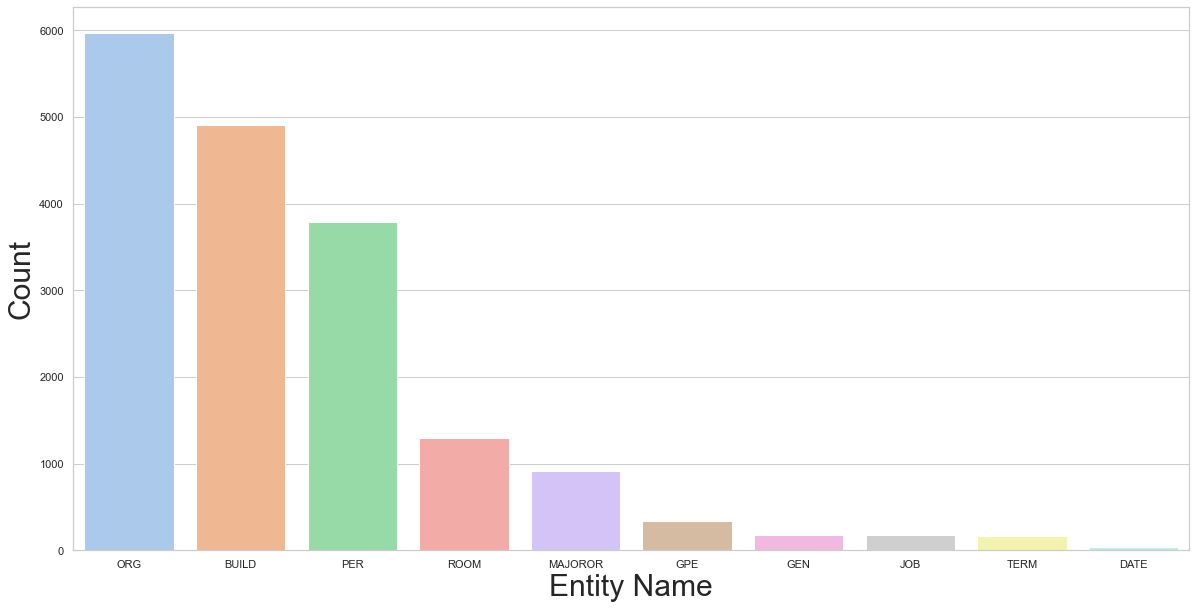

In [20]:
colors = sns.color_palette('pastel')[0:10]
plt.figure(figsize=(20, 10))
sns.barplot(data=entity_types_count, x="Entity Type", y="Count", palette=colors)
plt.xlabel("Entity Name", fontsize=30)
plt.ylabel("Count", fontsize=30)

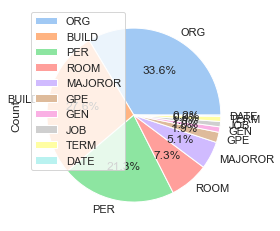

In [26]:
def plot_pieplot():
    colors = sns.color_palette('pastel')[0:10]
    entity_types_count.set_index("Entity Type").plot.pie(y="Count", colors = colors, autopct='%.1f%%')
plot_pieplot()


In [16]:
print("Entities")
tmp = pd.DataFrame(entities_count.Entity)
print(tabulate(tmp))

Entities
---  --------------------------------
231  តារាងបាល់ទាត់វវិទ្យាល័យសុីអេដីឌី
152  អាគារអាយដីធី
176  បន្ទប់Accountantវិទ្យាល័យសុីអេដីឌី
104  តារាងបាល់ទាត់វិទ្យាល័យសុីអេដីឌី
101  ទីលានបាល់ទាត់វិទ្យាល័យសុីអេដីឌី
102  កន្លែងលេងបាល់ទាត់វិទ្យាល័យសុីអេដីឌី
103  ទីលានសម្រាប់ទាត់បាល់វិទ្យាល័យសុីអេដីឌី
 93  បន្ទប់Accountant
 52  អាគារinnovationcenter
 48  ទីលានបាល់ទាត់
 49  តារាងបាល់ទាត់
 50  កន្លែងលេងបាល់ទាត់
 51  ទីលានសម្រាប់ទាត់បាល់
 28  សាលាស៊ីអេឌីធី
 25  សាលាCADT
 18  អន្តេរវាសិកដ្ឋាន
 16  កន្លែងស្នាក់
 17  Dormitory
 12  អាគារអាយឌីអរអាយ
 11  អាគារIDRI
  8  អាគារIDT
  5  អាគារInnovationCenter
  2  អាគារអាយឌីធី
  1  អាគារអុីនូវេសិនសែនធឺរ
156  ថ្ងៃសៅរិ៍
160  ថ្ងៃអាទិត្យ
162  ថ្ងៃច័ន្ទ
163  ថ្ងៃសុក្រ
164  ថ្ងៃព្រហស្បតិ៍
165  ថ្ងៃពុធ
167  ថ្ងៃអង្គារ
221  ជំនាន់៨ស៊ីអេស
222  Gen6ស៊ីអេស
223  Gen7ស៊ីអេស
225  ជំនាន់៦ស៊ីអេស
226  ជំនាន់៧ស៊ីអេស
 96  ជំនាន់៦
 97  Gen7
 98  Gen6
 99  ជំនាន់៧
100  ជំនាន់៨
 94  Gen8
228  ខេត្តបាត់ដំបង
229  ខេត្តព្រៃវែង
230  ខេត្តសៀមរាប
220  ខេត្តស្ទឹងត្រែង
147  ខេត

## Intent Description

Intent
AskABoutCS_CourseInEachGen          144
AskAboutAcademicFee                  78
AskAboutAccountantRoom              180
AskAboutAge                         120
AskAboutCarParkingFee              2800
AskAboutClubInfo                     63
AskAboutCompetition                 144
AskAboutDormInfo                   1512
AskAboutEC_CourseInEachGen           72
AskAboutEnrollmentRequirement      1499
AskAboutEnrollmentRequirementR        1
AskAboutInterest                    120
AskAboutLocation                    176
AskAboutMinistry                    105
AskAboutMotocycleParkingFee        1575
AskAboutParkingPrice                 96
AskAboutProvince                    138
AskAboutRegisterDate                 60
AskAboutSchoolMajors                852
AskAboutStudyHour                   720
AskAboutTN_CourseInEachGen          144
AskHowToComplain                   3201
AskWhereHRRoomIs                   1680
AskWhetherPoepleWorkonExactDate     132
AskWorkingDate                   

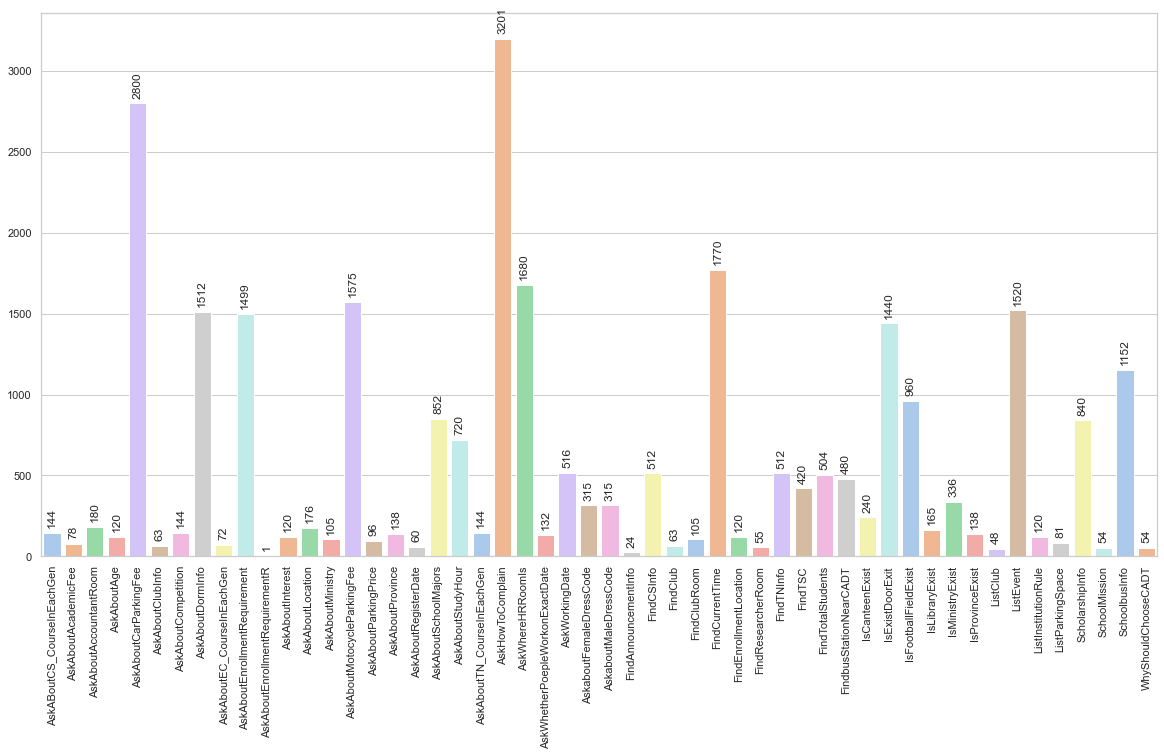

In [27]:
# plt.figure(figsize=(16,8))
def getPalleteAndArrangeValue(color: str, size, as_cmap: bool = False):
    pal = sns.color_palette(color, len(size), as_cmap=as_cmap)

    # First sort of list
    rank = size.argsort()

    # Second sort where we can now define which should have the brightest color
    proper = rank.argsort()

    # Convert the tuple to a list, also to arrange the the color according to the size of each index of the list
    aray = np.array(pal)[proper]
    return aray
plt.figure(figsize=(20, 10))
allDataset = pd.read_csv("all_data/all_data_dataset.csv")
allDataset.head()
sns.set(style="whitegrid", color_codes=True)

dataCount = allDataset.groupby("Intent").size()

aray = getPalleteAndArrangeValue(color="Greens_d", size=dataCount)

ax = sns.barplot(x=dataCount.index.tolist(), y=dataCount.values.tolist(), palette='pastel')

plt.bar_label(ax.containers[0], padding=5, rotation=90)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

print(dataCount)
print("-------------------------")
plt.show()